In [2]:

from ML_model.naive_classifier import Net
from ML_model import ML_utils
import torch
from torch import optim, nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt

Now download the datasets (we need to do this with our own data)

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


Define a function to 'plot' the images and set or hyperparameters for optimization (the optimizing method, the learning rate, and the momentum). We also initialize the network.

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Now we optimize the model and save the weights externally to a file in `STATE_PATH`. 

In [5]:
STATE_PATH = "ML_model/weights.pt"
NUM_EPOCHS = 3
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
ML_utils.save_weights(net, STATE_PATH)
print('Finished Training')

[1,  2000] loss: 2.253
[1,  4000] loss: 1.884
[1,  6000] loss: 1.653
[1,  8000] loss: 1.563
[1, 10000] loss: 1.498
[1, 12000] loss: 1.465
[2,  2000] loss: 1.401
[2,  4000] loss: 1.402
[2,  6000] loss: 1.340
[2,  8000] loss: 1.329
[2, 10000] loss: 1.308
[2, 12000] loss: 1.258
Finished Training


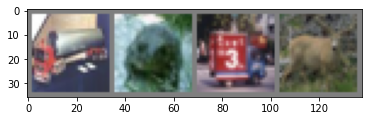

In [28]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))

In [29]:
newnet = Net()
ML_utils.load_weights(newnet, STATE_PATH)
outputs = newnet(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  car   frog  truck deer 
